In [2]:
#Ensemble Method: We will use Balanced Random Forest from the imblearn package, which is specifically tailored for imbalanced data.
#Classifier: We will train the BRF (Balanced Random Forest) model on the original imbalanced dataset.
#Metrics: The performance metrics will include accuracy, precision, recall, F1-score, and a confusion matrix.

# Import necessary libraries for the ensemble method
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Step 1: Loading the dataset
df = pd.read_csv('creditcard.csv')

In [7]:
# Step 2: Separating features and target variable
X = df.drop(columns=['Class'])  # All features except the target 'Class'
y = df['Class']  # Target variable is the 'Class' column

In [11]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Step 4: Train the Balanced Random Forest (BRF) Classifier on the original imbalanced dataset
# sampling_strategy='all': Ensures all minority class samples are used for resampling.
# replacement=True: Allows sampling with replacement.
# bootstrap=False: Disables bootstrap sampling to match the future behavior.
brf = BalancedRandomForestClassifier(n_estimators=100, 
                                     random_state=42, 
                                     sampling_strategy='all', 
                                     replacement=True, 
                                     bootstrap=False)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=False, random_state=42,
                               replacement=True, sampling_strategy='all')

In [19]:
# Step 5: Make predictions on the test set
y_pred = brf.predict(X_test)

In [21]:
# Step 6: Report Performance Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9917


In [23]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.1604
Recall: 0.9082
F1-Score: 0.2726


In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

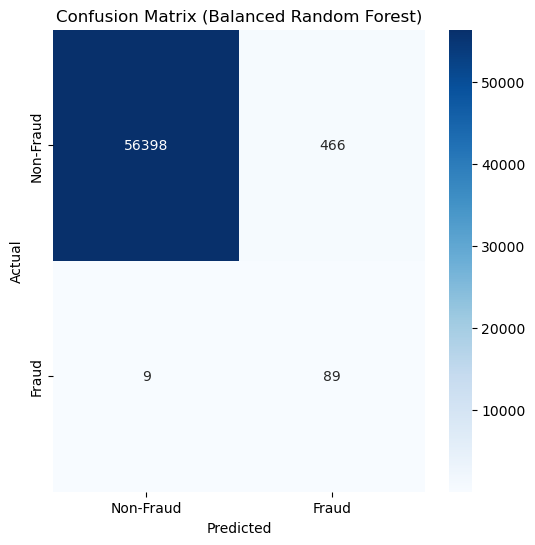

In [27]:
# Step 7: Display the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix (Balanced Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()